In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## start comparaison 
## on va comparer le DNN avec un RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

## end comparaison


import tensorflow as tf
import keras
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Reshape, InputLayer, AveragePooling2D

from keras.datasets import mnist, fashion_mnist


In [2]:
random_state = 42

tf.random.set_seed(
    random_state
)

"""https://github.com/ashishpatel26/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network"""

# utilities

In [3]:
## plot and evaluate model

def plot_cm_display(y_true: np.array, y_pred: np.array, labels=None) -> None:
    cm = confusion_matrix(y_true, y_pred)
    
    #plt.figure(figsize=(20, 8))
    #plt.title('Confusion Matrix\n')
    CM = ConfusionMatrixDisplay(cm,display_labels=labels)
    CM.plot()
    #sns.heatmap(cm, cmap='vlag', annot=True, fmt='d', cbar=False)
    plt.xlabel('y_pred')
    plt.ylabel('y_true')
    plt.xticks(rotation=90)
    plt.show()


def plot_lc(history: dict, metrics: list = ['loss', 'accuracy']) -> None:
    plt.figure(figsize=(20, 8))
    for i, metric in enumerate(metrics):
        plt.subplot(1, 2, i+1)
        plt.title(f'Learning curve for {metric}\n')
        plt.plot(history[metric], label='train')
        plt.plot(history[f'val_{metric}'], label='val')
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        if metric == 'accuracy':
            plt.ylim(0,1.1)
    plt.show()



# Data

In [4]:
### integrated data "mnist" from tensorflow
### only use this method for library-integrated data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [5]:
#60k imgs with 28 pixels by 28 pixels
X_train.shape

(60000, 28, 28)

# EDA


In [6]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## format

In [7]:
type(X_train)

numpy.ndarray

In [8]:
X_train.shape ### 60_000 lignes/number of images, 28x28 pixels

(60000, 28, 28)

In [9]:
X_train.dtype # unsigned integer 0->255

dtype('uint8')

In [10]:
np.sum(np.isnan(X_train),axis=None)

np.int64(0)

## univariate-target

T-shirt/top    6000
Trouser        6000
Pullover       6000
Dress          6000
Coat           6000
Sandal         6000
Shirt          6000
Sneaker        6000
Bag            6000
Ankle boot     6000
Name: count, dtype: int64

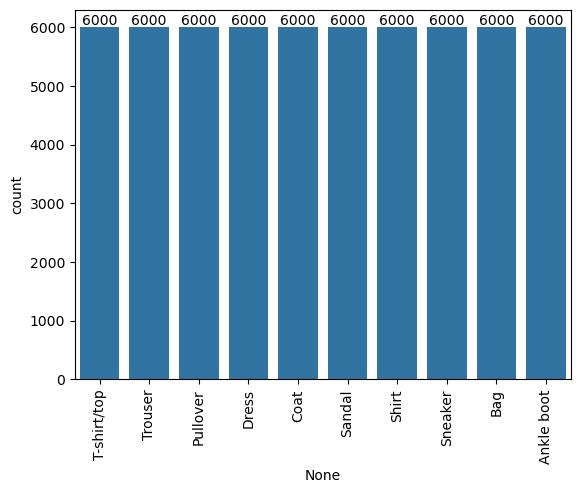

In [11]:
y_series = pd.Series(data=y_train, name='y_train')
GB_y = y_series.value_counts().sort_index()
GB_y.index = labels

display(GB_y)

ax = sns.barplot(x=GB_y.index,y=GB_y)
for c in ax.containers:
    ax.bar_label(c)

plt.xticks(rotation=90)
plt.show()


## univariate-features

In [12]:
print('max=',np.max(X_train,axis=None))
print('min=',np.min(X_train,axis=None))
print('mean=',np.mean(X_train,axis=None))
print('std=',np.std(X_train,axis=None))

max= 255
min= 0
mean= 72.94035223214286
std= 90.02118235130526


## distribution of images

### examples

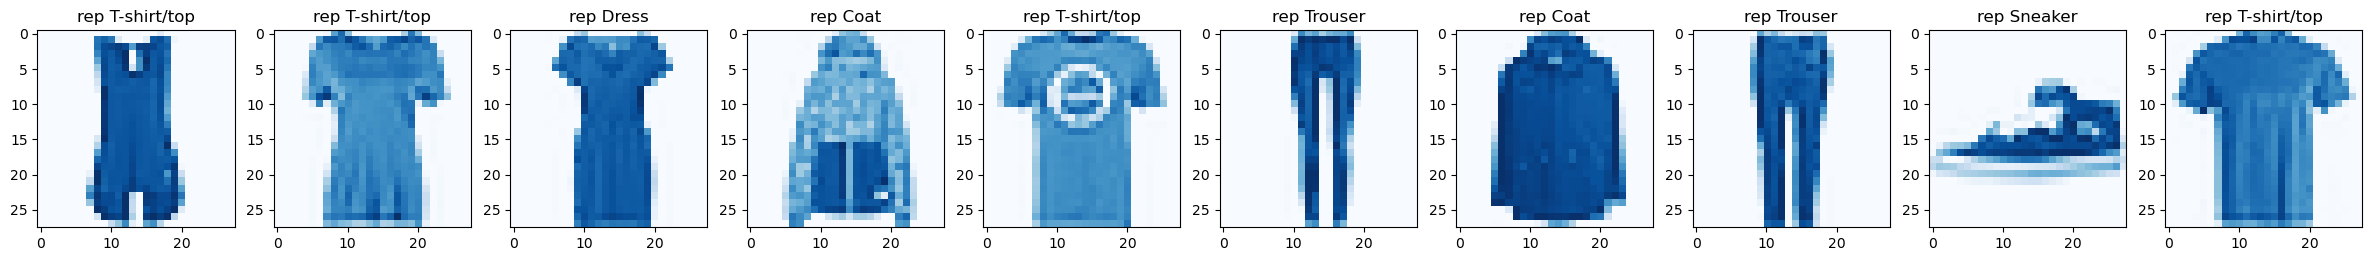

In [13]:
N = 10
lst_rdm = np.unique(np.random.randint(1,200,N))

plt.figure(figsize=(3*N,5))
for n,idx in enumerate(lst_rdm):
    plt.subplot(1,N,n+1)
    plt.imshow(X_train[idx], cmap='Blues')
    plt.title(f'rep {labels[y_train[idx]]}')

plt.show()

## global distribution

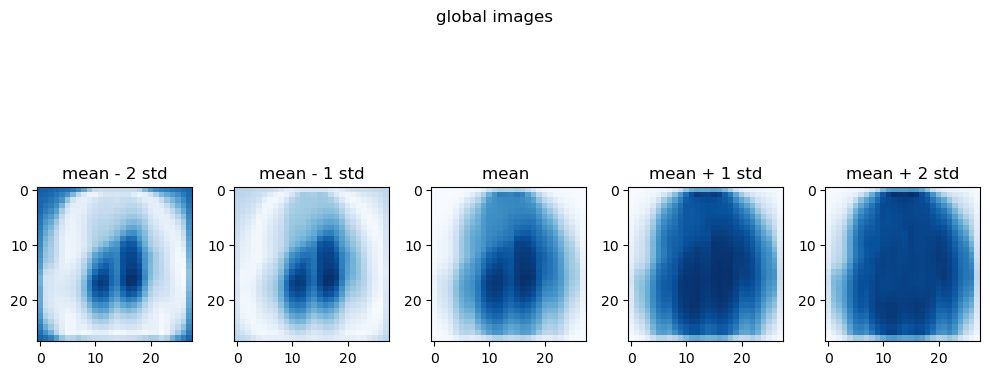

In [14]:
glob_avg_img = np.mean(X_train,axis=0) ## image moyenne
glob_std_img = np.std(X_train,axis=0) ## std d'image

plt.figure(figsize=(10,5))
plt.subplot(1,5,1)
plt.imshow(glob_avg_img-2*glob_std_img,cmap='Blues')
plt.title(f'mean - 2 std')

plt.subplot(1,5,2)
plt.imshow(glob_avg_img-1*glob_std_img,cmap='Blues')
plt.title(f'mean - 1 std')

plt.subplot(1,5,3)
plt.imshow(glob_avg_img ,cmap='Blues')
plt.title(f'mean ')

plt.subplot(1,5,4)
plt.imshow(glob_avg_img+1*glob_std_img,cmap='Blues')
plt.title(f'mean + 1 std')

plt.subplot(1,5,5)
plt.imshow(glob_avg_img+2*glob_std_img,cmap='Blues')
plt.title(f'mean + 2 std')

plt.suptitle('global images')
plt.tight_layout()
plt.show()

## bivariate image distribution

------------------------------
y=T-shirt/top
max= 255
min= 0
mean= 83.02998044217686
std= 89.43848028161399
------------------------------


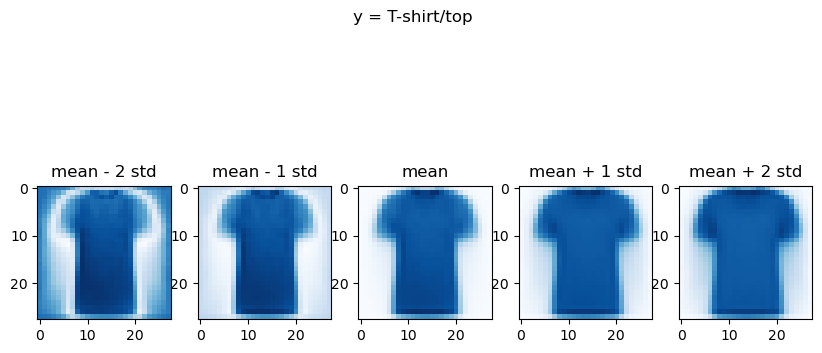

------------------------------
y=Trouser
max= 255
min= 0
mean= 56.84085522959184
std= 87.60026328776992
------------------------------


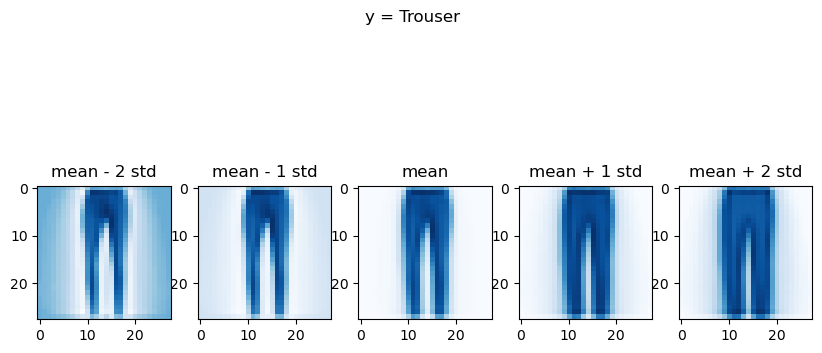

------------------------------
y=Pullover
max= 255
min= 0
mean= 96.058762542517
std= 91.463466369116
------------------------------


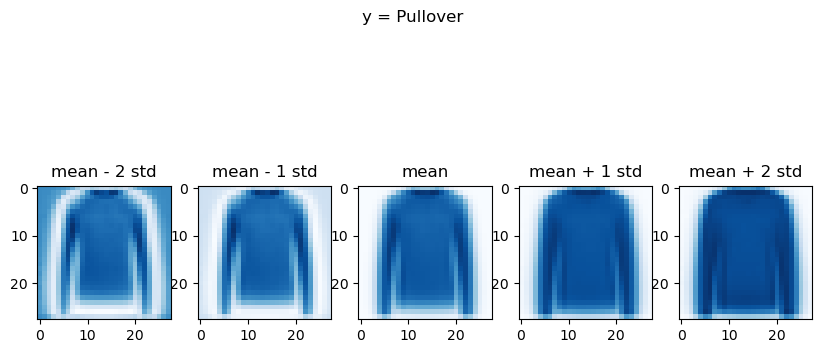

------------------------------
y=Dress
max= 255
min= 0
mean= 66.01890858843538
std= 90.32600060468408
------------------------------


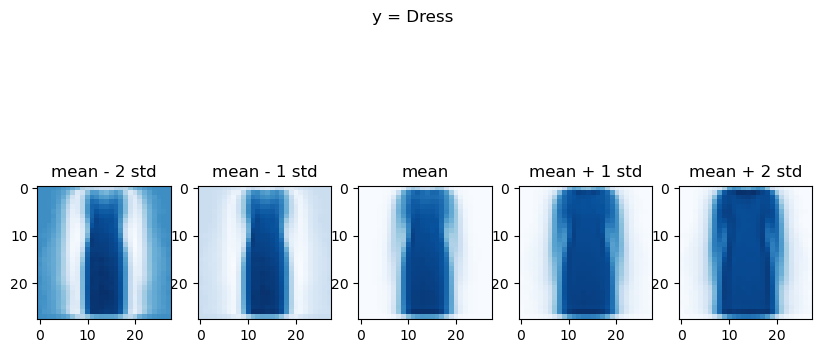

------------------------------
y=Coat
max= 255
min= 0
mean= 98.25800552721088
std= 95.95952360444912
------------------------------


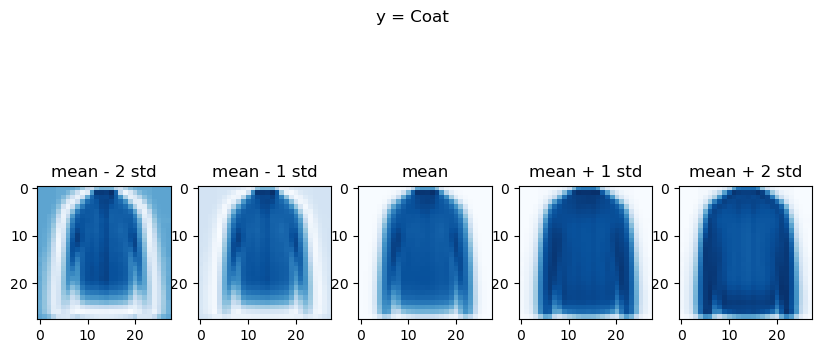

------------------------------
y=Sandal
max= 255
min= 0
mean= 34.86754655612245
std= 67.09256263215387
------------------------------


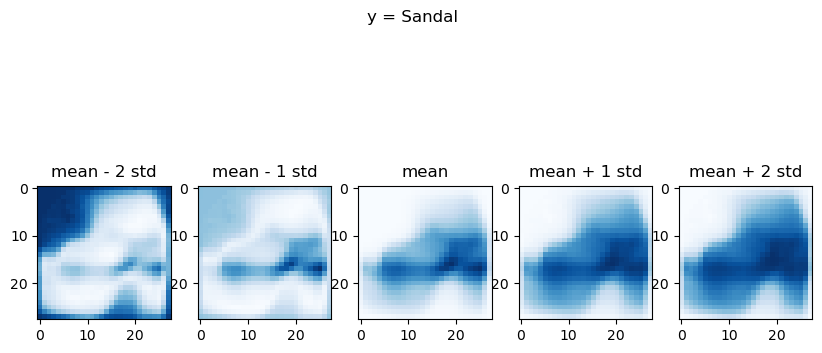

------------------------------
y=Shirt
max= 255
min= 0
mean= 84.60511989795918
std= 86.51605067391723
------------------------------


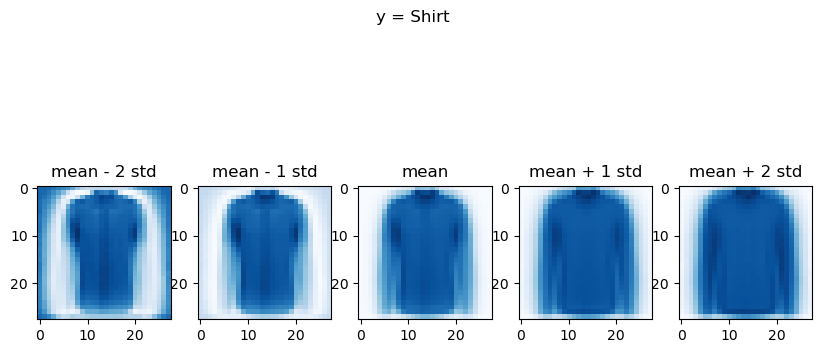

------------------------------
y=Sneaker
max= 255
min= 0
mean= 42.76207227891157
std= 75.17057254477353
------------------------------


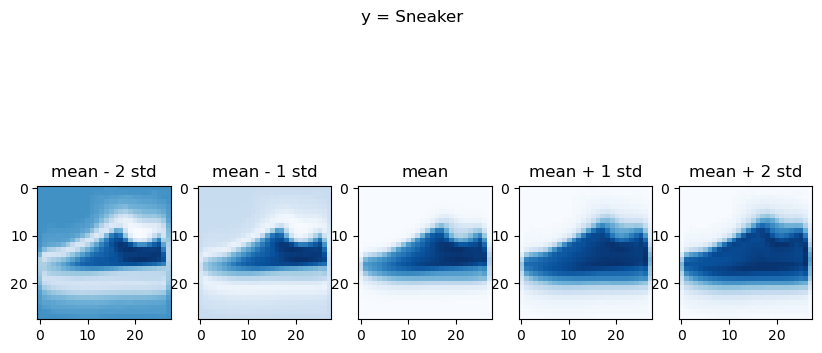

------------------------------
y=Bag
max= 255
min= 0
mean= 90.15715284863946
std= 93.1441500812113
------------------------------


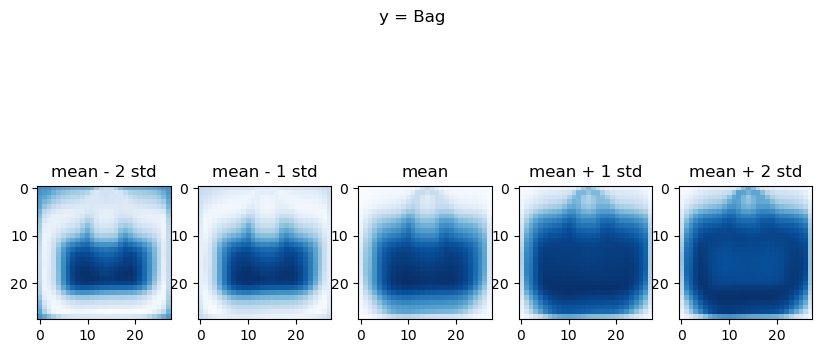

------------------------------
y=Ankle boot
max= 255
min= 0
mean= 76.80511840986395
std= 94.4858832774788
------------------------------


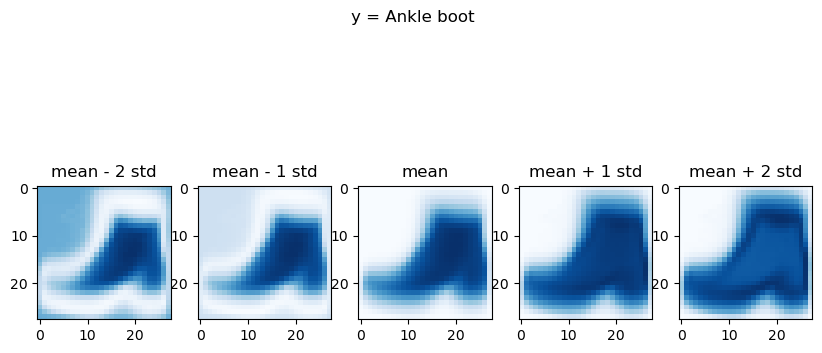

In [15]:
N_y = len(GB_y)

for n,y in enumerate(GB_y.index):
    
    plt.figure(figsize=(10,5))
    cond_y = y_train == n
    X_train_y = X_train[cond_y]
    print('-'*30)
    print(f'y={y}')
    print('max=',np.max(X_train_y,axis=None))
    print('min=',np.min(X_train_y,axis=None))
    print('mean=',np.mean(X_train_y,axis=None))
    print('std=',np.std(X_train_y,axis=None))
    print('-'*30)
    
    avg_img_y = np.mean(X_train_y ,axis=0)
    std_img_y = np.std(X_train_y  ,axis=0)

    plt.subplot(1, 5, 1)
    plt.imshow(avg_img_y-2*std_img_y,cmap='Blues')
    plt.title(f'mean - 2 std')
    
    plt.subplot(1, 5, 2)
    plt.imshow(avg_img_y-1*std_img_y,cmap='Blues')
    plt.title(f'mean - 1 std')
    
    plt.subplot(1, 5, 3)
    plt.imshow(avg_img_y ,cmap='Blues')
    plt.title(f'mean')
    
    plt.subplot(1, 5, 4)
    plt.imshow(avg_img_y+1*std_img_y,cmap='Blues')
    plt.title(f'mean + 1 std')
    
    plt.subplot(1, 5, 5)
    plt.imshow(avg_img_y+2*std_img_y,cmap='Blues')
    plt.title(f'mean + 2 std')

    plt.suptitle(f'y = {y}')
    plt.show()
    
    

# preprocessing

In [17]:

### NN très sensible à l'echelle de grandeur ==> standardiser/normaliser entre 0 et 1 par convention
X_train = X_train/np.max(X_train,axis=None) ## diviser par 255
X_test = X_test/np.max(X_test,axis=None)



In [18]:
28*28

784

# Models

In [24]:
def my_dnn():
    
    ### PARAMETRES SPECIFIQUE AU DATA ###
    N_INPUT = (28,28,)
    N_OUTPUT = 10

    LOSS = "sparse_categorical_crossentropy"
    OUTPUT_ACTIVATION_FUNCTION = "softmax"
    
    ### PARAMETRES ARBITRAIRES ###
    ACTIVATION_FUNCTION = "tanh" ## tanh, sigmoid, relu, linear
    
    model = keras.models.Sequential([
        ### INPUT LAYER ###
        InputLayer(shape=N_INPUT, name="my_input_layer")
        ,Reshape((28, 28, 1))

        ,Flatten()
        
        ### START HIDDEN LAYER ###
        ,Dense(units=256, activation=ACTIVATION_FUNCTION, name="my_first_dense_layer")
        ,Dense(units=256, activation=ACTIVATION_FUNCTION,)
        ,Dense(units=64, activation="relu",)
        
        ### END HIDDEN LAYER ###
        
        ### OUTPUT LAYER ###
        ,Dense(units=N_OUTPUT, activation=OUTPUT_ACTIVATION_FUNCTION, name= "my_output_layer")
    ])
    
    model.compile(
            optimizer=keras.optimizers.Adam() #'adam', ## use this by default
            ,loss=LOSS 
            ,metrics=['accuracy'] ### additional metrics to calculate
    )
    
    return model

In [37]:
def mymodel():

    ### PARAMETRES SPECIFIQUE AU DATA ###
    N_INPUT = (28,28,)
    N_OUTPUT = 10

    LOSS = "sparse_categorical_crossentropy"
    OUTPUT_ACTIVATION_FUNCTION = "softmax"
    
    ### PARAMETRES ARBITRAIRES ###
    ACTIVATION_FUNCTION = "tanh" ## tanh, sigmoid, relu, linear
    RELU = "relu"
    
    model = keras.models.Sequential([
        ### INPUT LAYER ###
        InputLayer(shape=N_INPUT, name="my_input_layer")
        ,Reshape((28, 28, 1))

        ### START CONVOLUTION ###
        ,Convolution2D(filters=16, kernel_size=7,padding='same', activation=RELU) ## 16 filtres différents
        #,Convolution2D(filters=16, kernel_size=5, padding='same', activation=ACTIVATION_FUNCTION)
        ,AveragePooling2D(2)

        ,Convolution2D(filters=32, kernel_size=5, padding='same', activation=RELU)
        ,Convolution2D(filters=32, kernel_size=3, padding='same', activation=ACTIVATION_FUNCTION)
        ,MaxPooling2D(2)
        
        ,Convolution2D(filters=32, kernel_size=2, padding='same', activation=RELU)
        ,MaxPooling2D(2)
        
        ,Convolution2D(filters=32, kernel_size=2, padding='same', activation=ACTIVATION_FUNCTION)
        ,Convolution2D(filters=32, kernel_size=2, padding='same', activation=RELU)
        ,MaxPooling2D(2)


        ,Flatten()
        
        ### START HIDDEN LAYER ###
        ,Dense(units=64, activation=ACTIVATION_FUNCTION, name="my_first_dense_layer")
        #,Dense(units=64, activation=ACTIVATION_FUNCTION,)
        ,Dense(units=64, activation=RELU,)
        
        ### END HIDDEN LAYER ###
        
        ### OUTPUT LAYER ###
        ,Dense(units=N_OUTPUT, activation=OUTPUT_ACTIVATION_FUNCTION, name= "my_output_layer")
    ])
    
    model.compile(
            optimizer=tf.keras.optimizers.Adam() #'adam', ## use this by default
            ,loss=LOSS 
            ,metrics=['accuracy'] ### additional metrics to calculate
    )
    
    return model

In [38]:
model = mymodel() ## creer/re-init
model.fit(X_train, y_train, batch_size=512, validation_split=0.15, epochs=10 ) # entrainer
#model.fit(X_train, y_train, batch_size=64, validation_split=0.15, epochs=5 ) # continuer l'entrainement, 
                                                                               # mais historique d'entrainement précédent peut être perdu

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.5638 - loss: 1.1926 - val_accuracy: 0.7386 - val_loss: 0.6750
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.7702 - loss: 0.5893 - val_accuracy: 0.7963 - val_loss: 0.5321
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.8212 - loss: 0.4815 - val_accuracy: 0.8354 - val_loss: 0.4603
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.8431 - loss: 0.4270 - val_accuracy: 0.8470 - val_loss: 0.4260
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.8552 - loss: 0.3917 - val_accuracy: 0.8549 - val_loss: 0.4055
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.8639 - loss: 0.3691 - val_accuracy: 0.8560 - val_loss: 0.4029
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.8693 - loss: 0.3518 - val_accuracy: 0.8590 - val_loss: 0.3901
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.8754 - loss: 0

In [ ]:
#model.fit(X_train, y_train, batch_size=64, validation_split=0.15, epochs=5 )

In [39]:
model.summary() # résumé du modèle (nécéssite entrainement)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_3 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 16)          │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 14, 14, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 7, 7, 32)            │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 3, 3, 32)            │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 3, 3, 32)            │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ my_first_dense_layer (Dense)         │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ my_output_layer (Dense)              │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,560 (494.38 KB)

 Trainable params: 42,186 (164.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84,374 (329.59 KB)

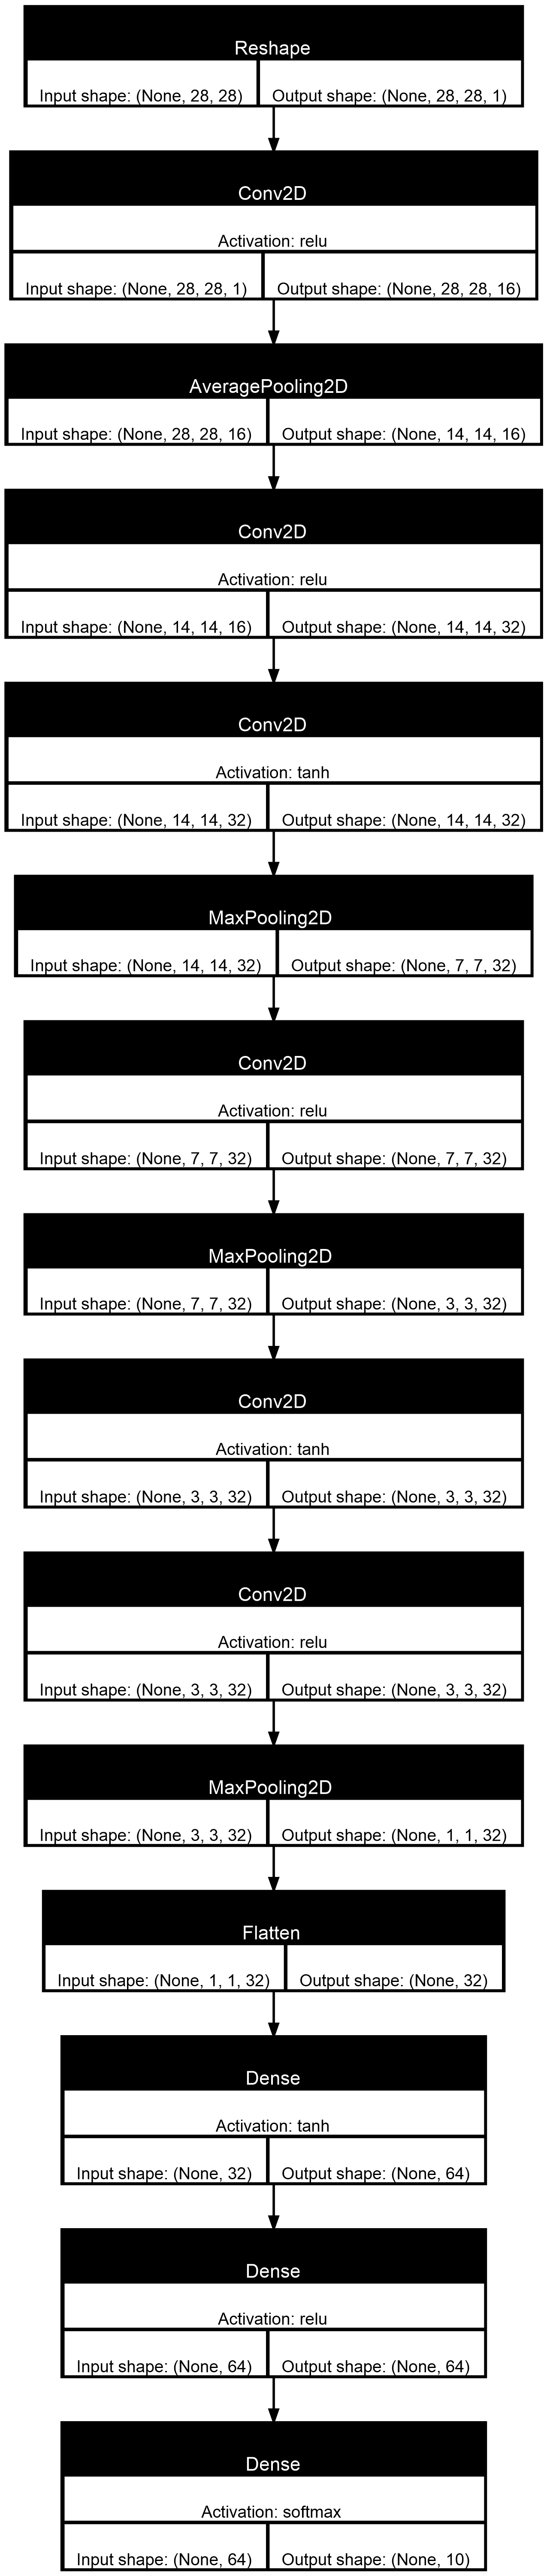

In [40]:
### anaconda : conda install pydot graphviz
keras.utils.plot_model(
    model = model,
    show_layer_activations=True,
    show_shapes=True
)

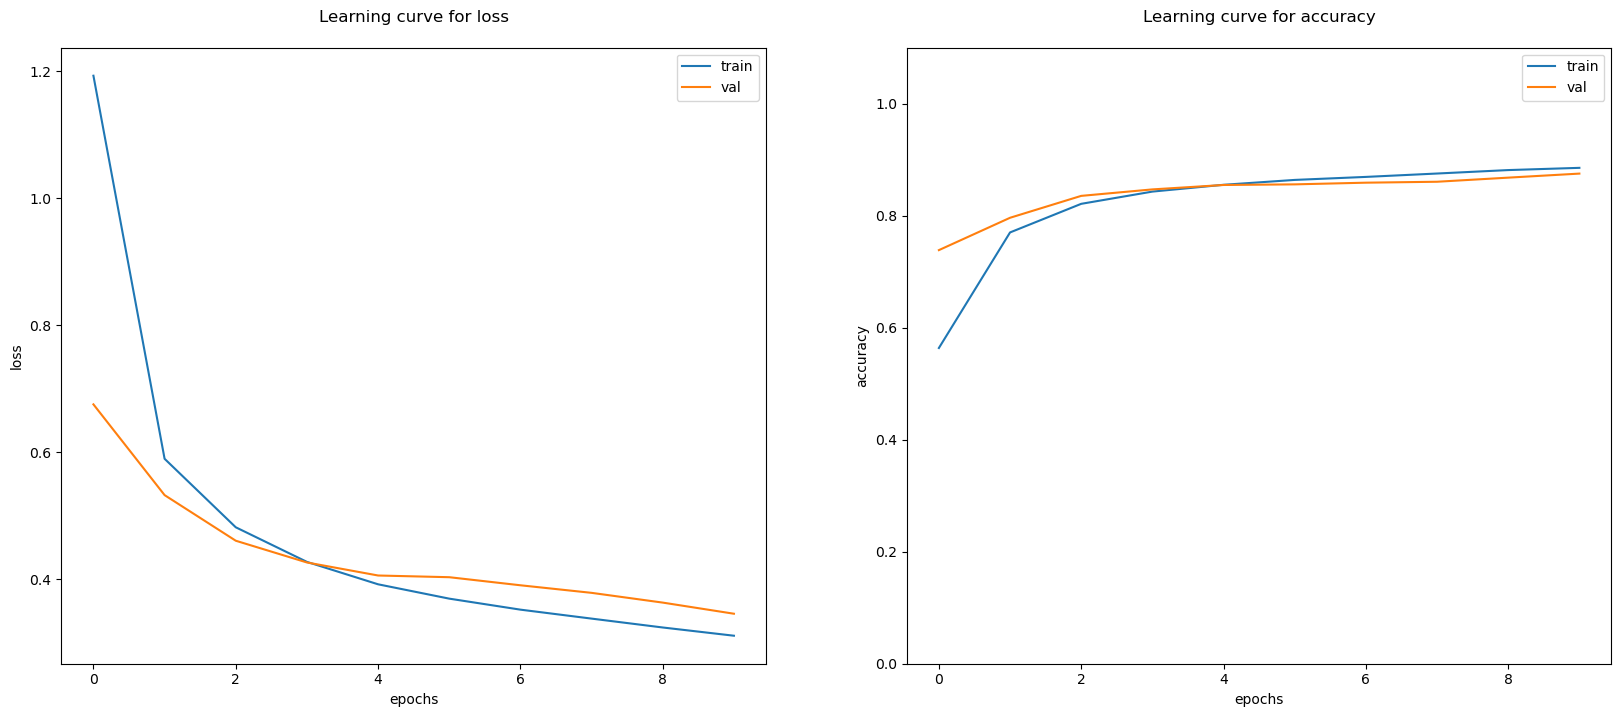

In [41]:
H = model.history.history

plot_lc(history=H)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


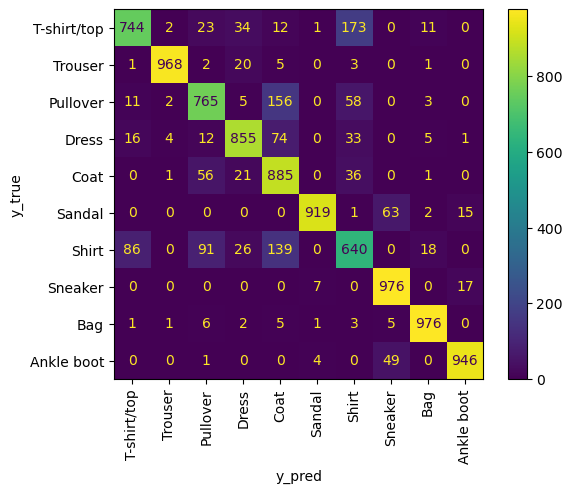

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.77      0.78      1000
           3       0.89      0.85      0.87      1000
           4       0.69      0.89      0.78      1000
           5       0.99      0.92      0.95      1000
           6       0.68      0.64      0.66      1000
           7       0.89      0.98      0.93      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [42]:
y_pred_range = model.predict(X_test)
y_pred = np.argmax(y_pred_range,axis=1)

plot_cm_display(y_true=y_test,y_pred=y_pred,labels=labels)
print(classification_report(y_true=y_test,y_pred=y_pred))

# DNN

In [32]:
dnn =  my_dnn() ## creer/re-init
dnn.fit(X_train, y_train, batch_size=512, validation_split=0.15, epochs=10 )

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7793 - loss: 0.6355 - val_accuracy: 0.8396 - val_loss: 0.4469
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8533 - loss: 0.4045 - val_accuracy: 0.8539 - val_loss: 0.3982
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8679 - loss: 0.3635 - val_accuracy: 0.8623 - val_loss: 0.3731
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8757 - loss: 0.3406 - val_accuracy: 0.8698 - val_loss: 0.3576
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8813 - loss: 0.3232 - val_accuracy: 0.8706 - val_loss: 0.3509
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8868 - loss: 0.3084 - val_accuracy: 0.8736 - val_loss: 0.3414
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8916 - loss: 0.2972 - val_accuracy: 0.8764 - val_loss: 0.3394
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8954 - loss: 0.2842 - val_accu

In [33]:
dnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ my_first_dense_layer (Dense)         │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ my_output_layer (Dense)              │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,552 (3.25 MB)

 Trainable params: 283,850 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,702 (2.17 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


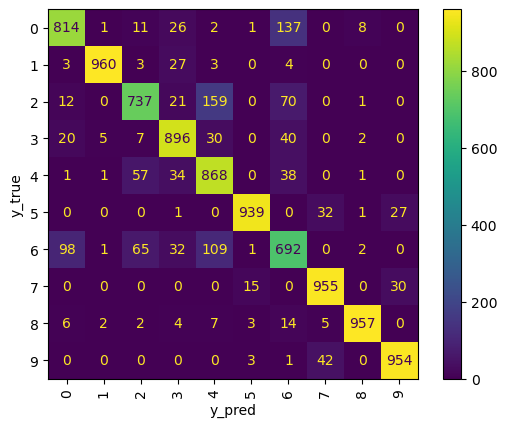

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.84      0.74      0.78      1000
           3       0.86      0.90      0.88      1000
           4       0.74      0.87      0.80      1000
           5       0.98      0.94      0.96      1000
           6       0.69      0.69      0.69      1000
           7       0.92      0.95      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [34]:
y_pred_range = dnn.predict(X_test)
y_pred = np.argmax(y_pred_range,axis=1)

plot_cm_display(y_true=y_test,y_pred=y_pred)
print(classification_report(y_true=y_test,y_pred=y_pred))

In [35]:
H = dnn.history.history

H
#plot_lc(history=H)

{'accuracy': [0.7793137431144714,
  0.8532745242118835,
  0.8679019808769226,
  0.875705897808075,
  0.8812745213508606,
  0.8868431448936462,
  0.8916274309158325,
  0.8953725695610046,
  0.8992941379547119,
  0.9038039445877075],
 'loss': [0.6354759335517883,
  0.4044857621192932,
  0.3635355830192566,
  0.34057438373565674,
  0.32318803668022156,
  0.3084293603897095,
  0.29715660214424133,
  0.2842191457748413,
  0.27303794026374817,
  0.262457937002182],
 'val_accuracy': [0.839555561542511,
  0.8538888692855835,
  0.862333357334137,
  0.8697777986526489,
  0.870555579662323,
  0.8735555410385132,
  0.8764444589614868,
  0.8799999952316284,
  0.8833333253860474,
  0.8853333592414856],
 'val_loss': [0.44692814350128174,
  0.39819321036338806,
  0.3731253147125244,
  0.35756176710128784,
  0.3509301245212555,
  0.3414410352706909,
  0.33943986892700195,
  0.3281513750553131,
  0.3182052969932556,
  0.3135627806186676]}

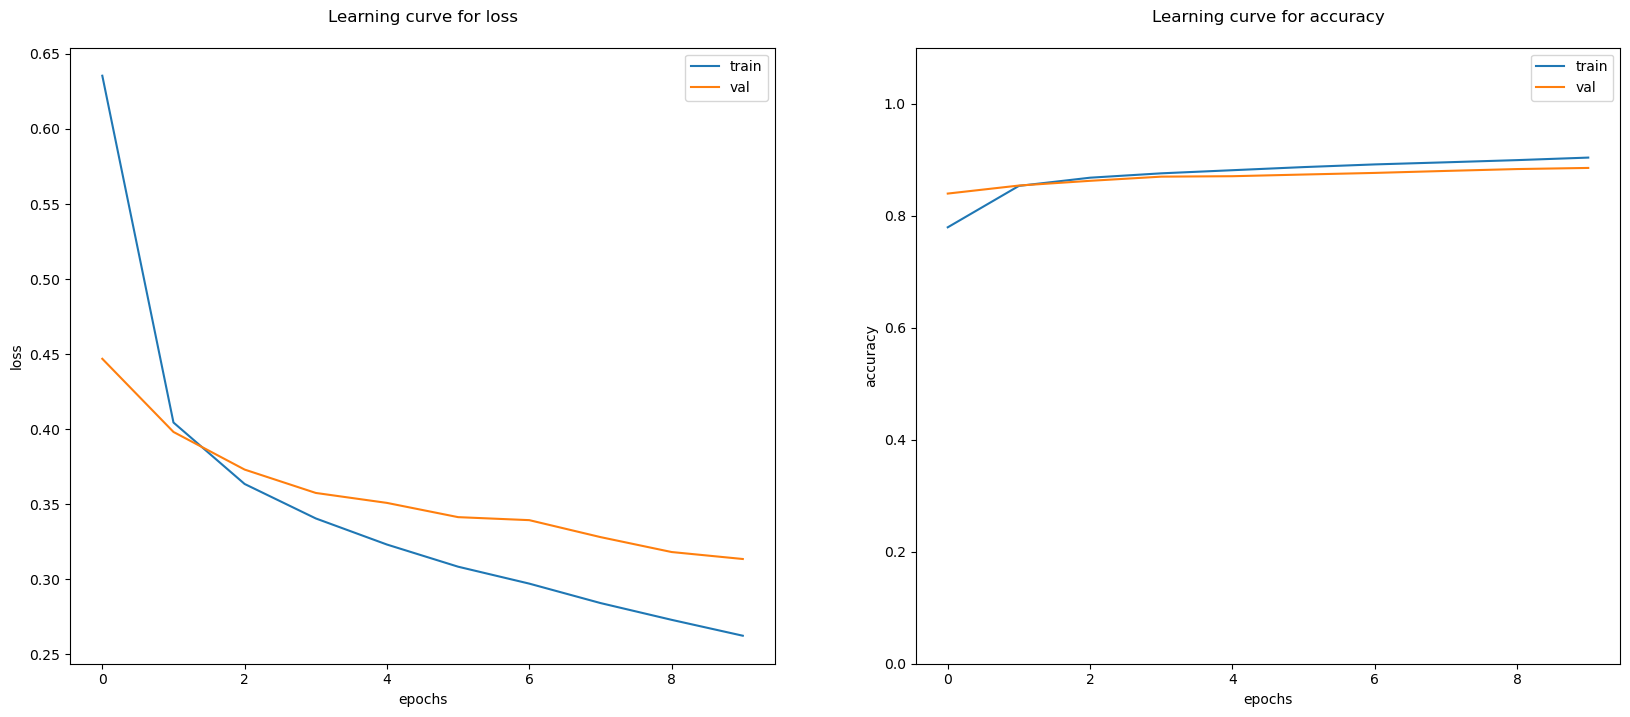

In [36]:
plot_lc(history=H)

# comparaison avec PCA + RF

In [ ]:
DO_PCA_RF = False

In [ ]:
from sklearn.pipeline import make_pipeline
if DO_PCA_RF:
    
    pca_rf = make_pipeline(PCA(n_components=100),RandomForestClassifier(n_estimators=21))
    
    display(pca_rf)

    X_train_flat = X_train.reshape(-1,28*28)
    
    param_grid_search = {'randomforestclassifier__max_depth':[5]}
    
    grid = GridSearchCV(pca_rf, param_grid=param_grid_search,scoring='f1_macro', verbose=2)
    grid.fit(X_train_flat,y_train)

In [ ]:
if DO_PCA_RF:
    best = grid.best_estimator_
    
    print(grid.best_score_)
    display(best)

In [ ]:
if DO_PCA_RF:
    X_test_flat = X_test.reshape(-1,28*28)
    y_pred_best = best.predict(X_test_flat)
    
    plot_cm_display(y_true=y_test,y_pred=y_pred_best,labels=labels)
    
    print(classification_report(y_true=y_test,y_pred=y_pred_best))